# Antes de empezar :
   - Estos ejercicios están relacionados con las lecciones Subconjunto y Estadísticas descriptivas.
   - Tenga en cuenta que necesitará utilizar algunas de las funciones que aprendió en las lecciones anteriores.
   - Todos los conjuntos de datos se proporcionan en la carpeta `your-code` de este laboratorio.
   - Elabora tus códigos y resultados tanto como puedas.
   - Esfuérzate al máximo para responder a las preguntas y completar las tareas y, sobre todo, ¡¡¡disfruta del proceso!!!

#### Importa todas las librerías necesarias

In [570]:
import pandas
import numpy as np
import matplotlib.pyplot as plt

# Desafío 1

#### En este reto utilizaremos el archivo `Temp_States.csv`. 

#### Primero impórtalo en un marco de datos llamado `temp`.

In [571]:
temp = pandas.read_csv('Temp_States.csv')

#### Print `temp`

In [572]:
temp

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Explore los tipos de datos del marco de datos Temp. ¿Qué tipo de datos tenemos? Comenta tu resultado.

In [573]:
# Tenemos disponible nombres de ciudad en la columna "City", el nombre de estado en "State" (con repeticiones por lo que se pueden realizar agrupaciones) y temperature (decimales)

#### Selecciona las filas en las que el estado es New York

In [574]:
ny = temp.query('State == "New York"')
ny

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### ¿Cuál es la temperatura media de las ciudades de Nueva York?

In [575]:
ny['Temperature'].median()

9.444444444444445

#### Queremos conocer las ciudades y estados con temperaturas superiores a 15 grados centígrados.

In [576]:
filtered = temp.query('Temperature > 15')

unique_states = filtered['State'].unique().tolist()
unique_cities = filtered['City'].unique().tolist()

np.concatenate([unique_cities, unique_states]).tolist()

['NYC',
 'Hartford',
 'Treton',
 'Newark',
 'New York',
 'Connecticut',
 'New Jersey']

#### Ahora, devuelva sólo las ciudades que tengan una temperatura superior a 15 grados centígrados.

In [577]:
unique_cities

['NYC', 'Hartford', 'Treton', 'Newark']

#### Queremos saber qué ciudades tienen una temperatura superior a 15 grados Celcius e inferior a 20 grados Celcius

*Pista: Primero escriba la condición y luego seleccione las filas.

In [578]:
cities = temp.query('Temperature > 15 and Temperature < 20')
cities
cities['City'].unique().tolist()

['NYC', 'Hartford']

In [579]:
temp['State'].value_counts()

State
New York       3
Connecticut    2
New Jersey     2
Name: count, dtype: int64

#### Halla la media y la desviación estándar de la temperatura de cada estado.

*Pista: Utiliza las funciones de la lección Manipulación de datos*.

In [580]:
# YOUR CODE HERE

# Desafío 2

#### Cargar el fichero `employee.csv` en un DataFrame. Llama al dataframe `employee`.

In [581]:
employee = pandas.read_csv('Employee.csv')

#### Explore los tipos de datos del marco de datos Temp. Comenta tus resultados

In [582]:
# Tenemos el nombre, el departamento (agrupable), educación (agrupable), Gender (agrupable), Title (agrupable), años de exp y salario

employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### Muestre visualmente la distribución de frecuencias (histograma) del conjunto de datos de empleados. Describa en pocas palabras estos histogramas.

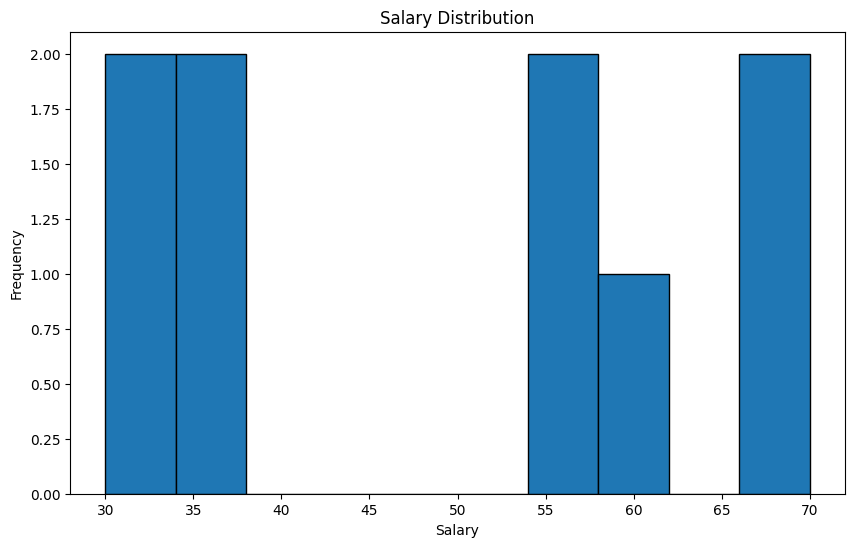

In [583]:
plt.figure(figsize=(10, 6))
plt.hist(employee['Salary'], bins=10, edgecolor='black')
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')

# Displaying the histogram
plt.show()

#### ¿Cuál es el salario medio en esta empresa?

In [584]:
employee['Salary'].median()

55.0

#### ¿Cuál es el salario más alto?

In [585]:
employee['Salary'].max()

70

#### ¿Cuál es el salario más bajo?

In [586]:
employee['Salary'].min()

30

#### ¿Quiénes son los empleados con el salario más bajo?

In [587]:
employee_sorted = employee.sort_values(by='Salary')
employee_sorted.head(5)['Name']

1     Maria
2     David
0      Jose
3     Sonia
4    Samuel
Name: Name, dtype: object

#### ¿Podría darnos toda la información sobre un empleado llamado David?

In [588]:
david = employee.query('Name == "David"')
david

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### ¿Podría dar sólo el sueldo de David?

In [589]:
david['Salary']

2    30
Name: Salary, dtype: int64

#### Printea todas las líneas en las que el cargo es asociado

In [590]:
associados = employee.query('Title == "associate"')
associados

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Printea las 3 primeras filas de tu dataframe

##### Consejo : Hay 2 maneras de hacerlo. Hazlo de las dos maneras

In [591]:
employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [592]:
pandas.read_csv('Employee.csv', nrows=3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### ¿Encuentra a los empleados cuyo cargo es asociado y cuyo salario es superior a 55?

In [621]:
associados = employee.query('Title == "associate" and Salary > 55')
associados

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Agrupa a los empleados en función del número de años que llevan trabajando. ¿Cuáles son los salarios medios de cada grupo?

In [623]:
grouped = employee.groupby('Years')['Salary'].median().reset_index()
grouped

,Years,Salary
0,1,35.0
1,2,30.0
2,3,55.0
3,4,35.0
4,7,60.0
5,8,70.0


#### ¿Cuál es el salario medio por título?

In [624]:
grouped = employee.groupby('Title')['Salary'].median().reset_index()
grouped

,Title,Salary
0,VP,70.0
1,analyst,32.5
2,associate,55.0


#### Muestra un resumen visual de los datos utilizando boxplot. ¿Cuáles son los cuartiles primero y tercero? Comenta tus resultados.

* Pista : Cuantiles vs Cuartiles*.
En Probabilidad y Estadística, los cuantiles son puntos de corte que dividen el rango de una distribución de probabilidad en intervalos continuos con probabilidades iguales. Cuando la división es en cuatro partes, los valores de la variable correspondientes al 25%, 50% y 75% de la distribución total se denominan cuartiles.

In [596]:
# YOUR CODE HERE

In [597]:
# print first quartile here

In [598]:
# print third quartile here

#### ¿Es diferente el salario medio por género?

In [599]:
# your answer here

#### Encuentra el mínimo, la media y el máximo de todas las columnas numéricas para cada Departamento.

##### Sugerencia: Utiliza las funciones de la lección Manipulación de Datos

In [600]:
# your answer here

### Pregunta bonus

#### Para cada departamento, calcule la diferencia entre el salario máximo y el salario mínimo.

##### * Sugerencia: pruebe a utilizar `agg` o `apply` y `lambda`*.

In [601]:
# your answer here


# Desafío 3

#### Abra el conjunto de datos Orders.csv. Nombre el conjunto de datos pedidos

In [602]:
# your answer here

#### Explore su conjunto de datos observando los tipos de datos y las estadísticas de resumen. Comenta tus resultados

In [603]:
# your answer here

In [604]:
# your answer here

#### ¿Cuál es el precio medio de compra?

In [605]:
# your answer here

#### ¿Cuáles fueron los precios de compra más altos y más bajos? 

In [606]:
# your answer here

In [607]:
# your answer here

#### Seleccione todos los clientes que tenemos en España

In [608]:
# your answer here

#### ¿Cuántos clientes tenemos en España?
##### Pista : Utiliza value_counts()

In [609]:
# your answer here

#### Selecciona todos los clientes que han comprado más de 50 artículos ?

In [610]:
# your answer here

#### Selecciona pedidos de España superiores a 50 artículos

In [611]:
# your answer here

#### Seleccionar todos los pedidos gratuitos

In [612]:
# your answer here

#### Seleccionar todos los pedidos que sean 'lunch bag
#### Pista: Utilice las funciones de cadena

In [613]:
# your answer here

#### Seleccione todos los pedidos realizados en 2011 y que sean «lunch bag».  

In [614]:
# your answer here

#### Muestra la distribución de frecuencias del importe gastado en España.

In [615]:
# your answer here

#### Seleccione todos los pedidos realizados en el mes de agosto

In [616]:
# your answer here

#### Seleccione cuántos pedidos se realizan por países en el mes de agosto
##### Pista: Utilice value_counts()

In [617]:
# your answer here

#### ¿Cuál es el gasto medio por país?

In [618]:
# your answer here

#### ¿Cuál es el artículo más caro?

In [619]:
# your answer here

#### ¿Cuál fue la cantidad media gastada al año?

In [620]:
# your answer here